## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data 

In [2]:
df = pd.read_excel('bank_telemaketing.xlsx')

In [3]:
df.shape

(41188, 21)

In [93]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,pred_prob_logreg,P_Rank_logreg,pred_prob_dtree,P_Rank_tree,pred_prob_rf,P_Rank_rf,pred_prob_gbm,P_Rank_GBM
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.011107,3,0.004969,1,0.023047,2,0.004704,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.004426,1,0.004969,1,0.018527,1,0.002730,3
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.008180,2,0.004969,1,0.022213,2,0.005182,5
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.006299,2,0.004969,1,0.021476,1,0.002832,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.012379,3,0.004969,1,0.022796,2,0.006378,6


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns', None)

### Warning Supression

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Label the Target feature to 1/0

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
df['target'] = np.where(df['y']=="yes",1,0)

### Drop the target feature to retain only Target

In [10]:
df=df.drop(['y'], axis =1)

### Defining Target and Independent Features

In [11]:
X = df.drop(['target'],axis = 1)
Y = df[['target']]

### Get the Event Rate

In [12]:
Y.mean()

target    0.112654
dtype: float64

### Split features into Numerical and Categorical

In [13]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [14]:
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [15]:
char.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [16]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts = pd.DataFrame(num.apply(lambda x: unique_levels(x)))
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [17]:
slice1 = df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [18]:
slice2 = df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list = slice2.index
num=num.loc[:,num_list]

In [19]:
char=pd.concat([char,cat],axis =1,join ='inner')

In [20]:
char.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [21]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


### Outlier Analysis of Numerical Features

In [22]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


### Capping and flooring of Outliers

In [23]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [24]:
num=num.apply(lambda x : outlier_cap(x))

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


### Missing Value Analysis

In [26]:
num.isnull().mean()

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
dtype: float64

## Feature Selection - Numerical Features

### Remove Features with 0 Variance

In [27]:
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold =0)
varselector.fit_transform(num)
#get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [28]:
num_1.iloc[0]

age                56.000
duration          261.000
campaign            1.000
pdays             999.000
cons.price.idx     93.994
cons.conf.idx     -36.400
euribor3m           4.857
Name: 0, dtype: float64

### Part 2 - Bi Variate analysis(Feature Discretization)

In [29]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode = 'ordinal',strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns = num_1.columns).add_suffix('Rank')
num_binned.head()

,ageRank,durationRank,campaignRank,pdaysRank,cons.price.idxRank,cons.conf.idxRank,euribor3mRank
0,9.0,6.0,0.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,0.0,6.0,6.0,5.0
2,4.0,6.0,0.0,0.0,6.0,6.0,5.0
3,5.0,4.0,0.0,0.0,6.0,6.0,5.0
4,9.0,7.0,0.0,0.0,6.0,6.0,5.0


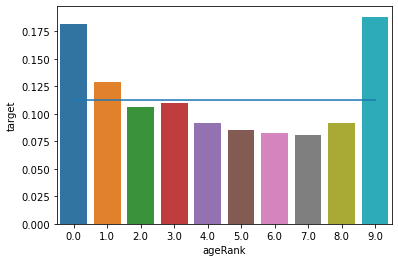

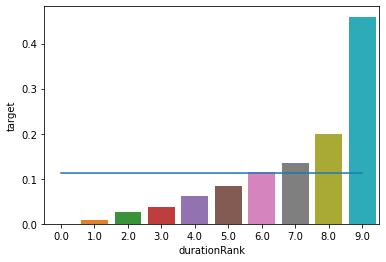

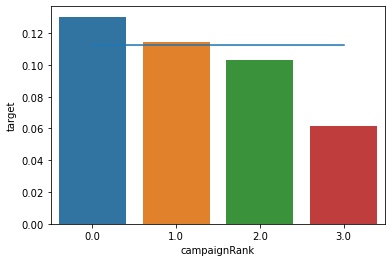

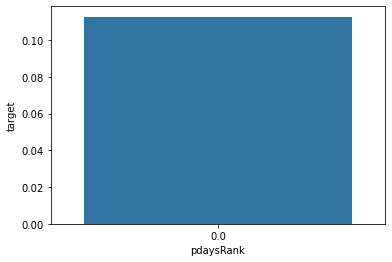

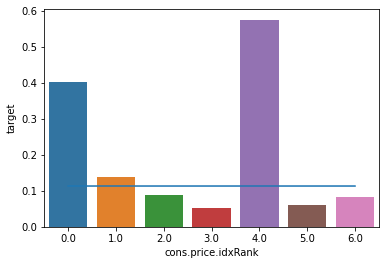

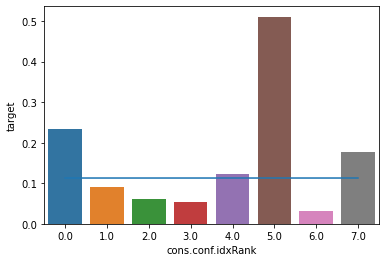

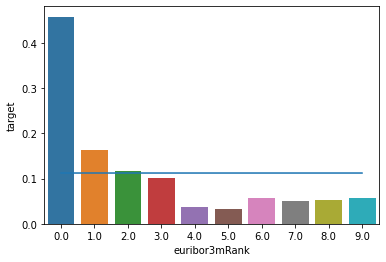

In [30]:
#check if the feature show slope at all
#if they do ,do you see some deciles above the population average and some below the population average?
#A strong slope will be the indicator of the feature's ability to descriminate the event from non event 
from statistics import mean
X_bin_combined = pd.concat([Y,num_binned],axis =1,join='inner')
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data = X_bin_combined,estimator=mean)
plt.show()

In [31]:
num_1=num_1.drop(['age','pdays'],axis=1)

In [32]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [33]:
select_features_df_num.shape

(41188, 5)

### Feature Selection - Categorical Features

### Part 1 - Bi Variate Analysis

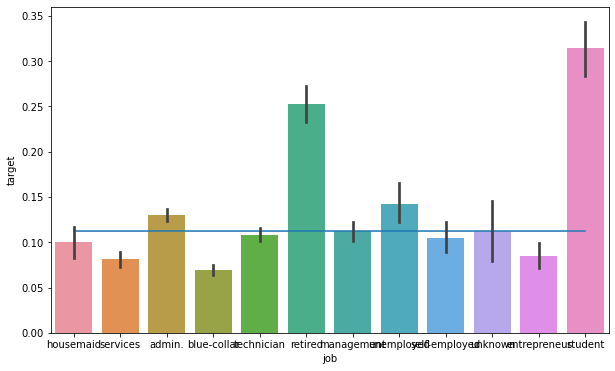

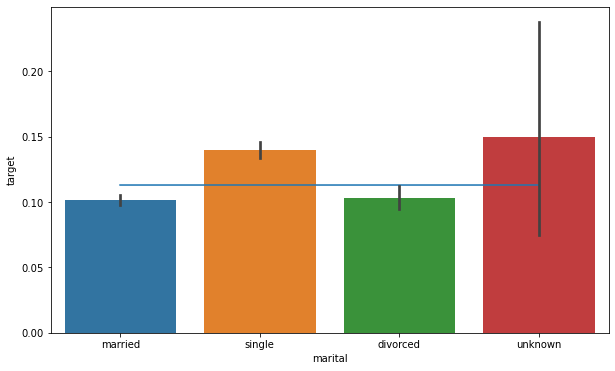

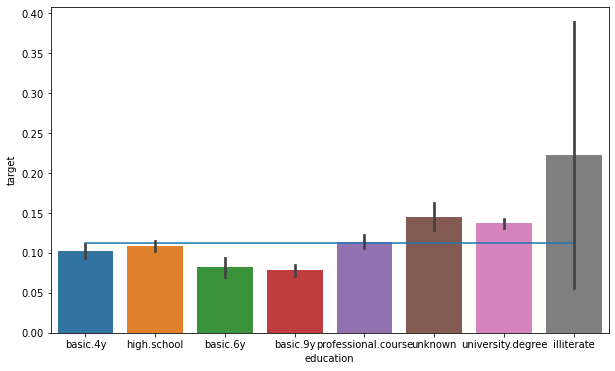

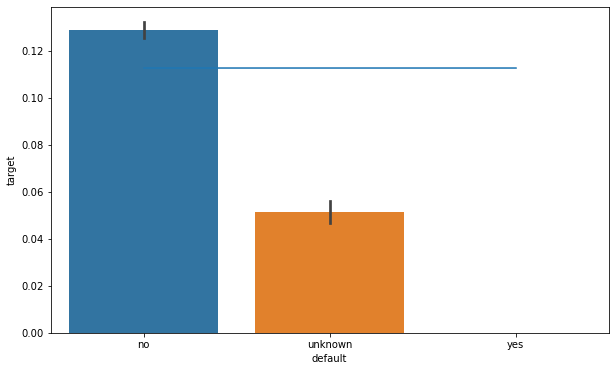

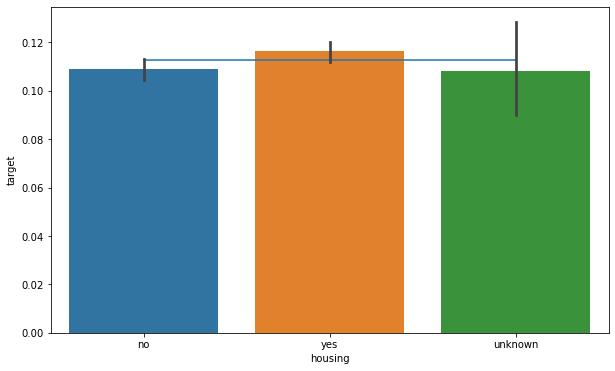

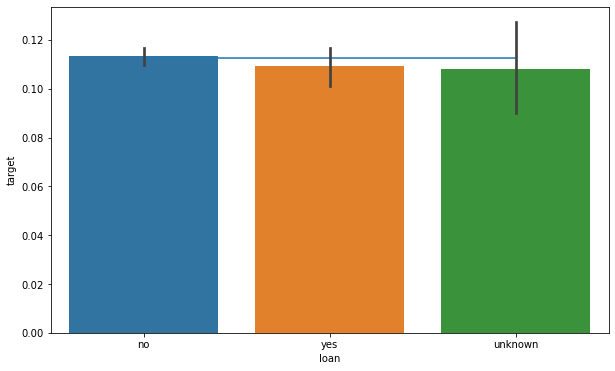

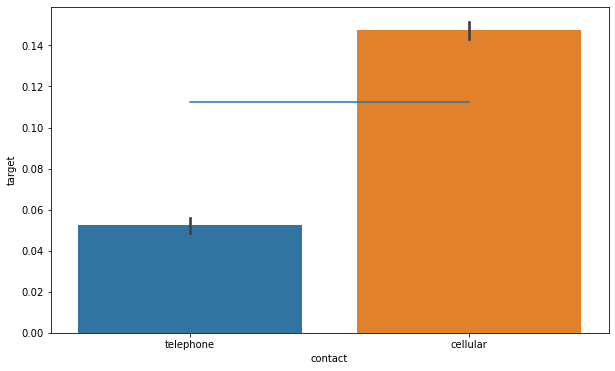

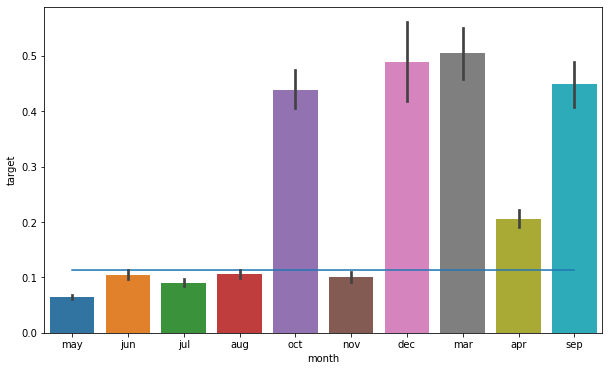

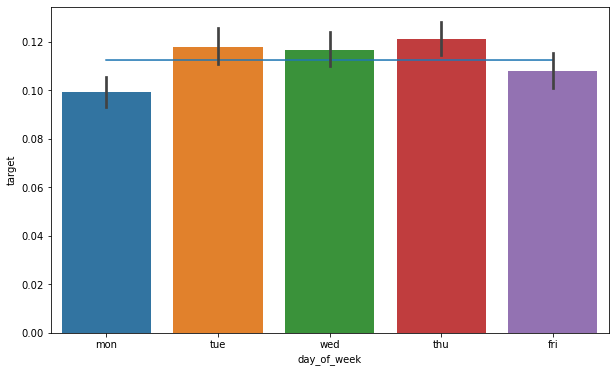

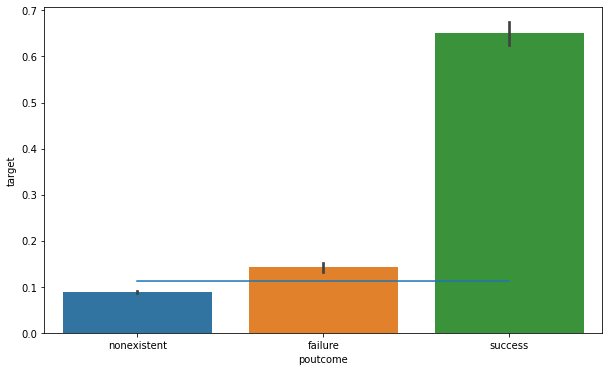

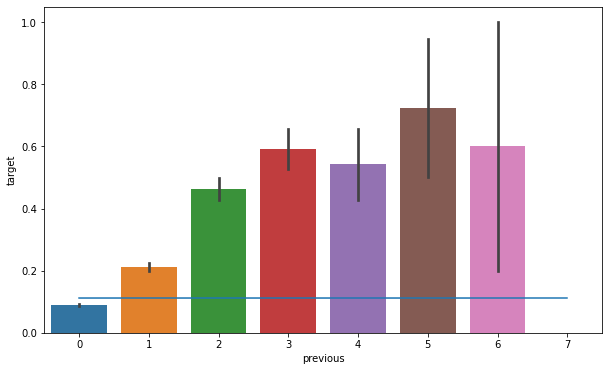

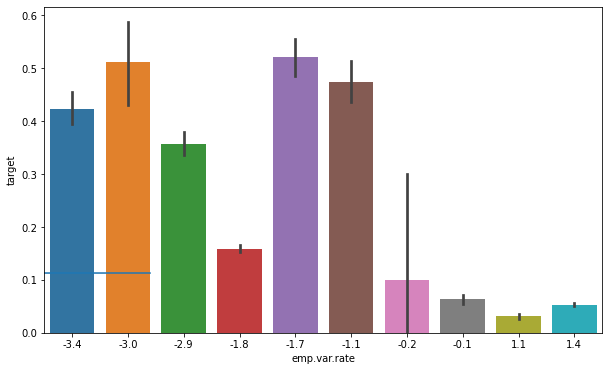

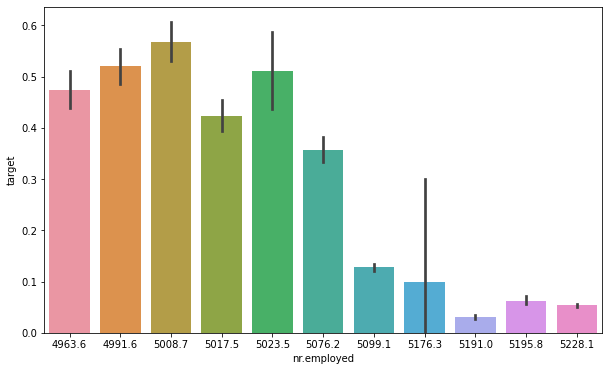

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure(figsize = (10,6))
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [35]:
char=char.drop(['housing','education','marital','loan','day_of_week'],axis=1)

In [36]:
char['default']=np.where(char['default'] =='unknown', 'yes', char['default'])

In [44]:
char['emp.var.rate'] = char['emp.var.rate'].astype('object')

In [45]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(41188, 35)

### Part 2 - Select K Best

### Select K Best for Categorical Features

In [52]:
from sklearn.feature_selection import SelectKBest, chi2 
selector = SelectKBest(chi2, k=30) 
selector.fit_transform(X_char_dum, Y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [53]:
select_features_df_char.dtypes

previous                  int64
nr.employed             float64
job_blue-collar           uint8
job_entrepreneur          uint8
job_housemaid             uint8
job_retired               uint8
job_services              uint8
job_student               uint8
job_unemployed            uint8
default_yes               uint8
contact_telephone         uint8
month_aug                 uint8
month_dec                 uint8
month_jul                 uint8
month_jun                 uint8
month_mar                 uint8
month_may                 uint8
month_nov                 uint8
month_oct                 uint8
month_sep                 uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
emp.var.rate_-3.0         uint8
emp.var.rate_-2.9         uint8
emp.var.rate_-1.8         uint8
emp.var.rate_-1.7         uint8
emp.var.rate_-1.1         uint8
emp.var.rate_-0.1         uint8
emp.var.rate_1.1          uint8
emp.var.rate_1.4          uint8
dtype: object

## Creating the Master Feature Set for Model Development

In [56]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [57]:
X_all.shape

(41188, 35)

### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [59]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 35)
Shape of Testing Data (12357, 35)
Response Rate in Training Data target    0.111616
dtype: float64
Response Rate in Testing Data target    0.115076
dtype: float64


## Model Building Step


In [60]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [61]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,previous,0.161499
1,nr.employed,-0.007049
2,job_blue-collar,-0.271432
3,job_entrepreneur,-0.004844
4,job_housemaid,0.003690
5,job_retired,0.118185
6,job_services,-0.124306
7,job_student,0.060259
8,job_unemployed,0.019648
9,default_yes,-0.220063


In [62]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [63]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=500, random_state=0)

In [64]:
!pip install pydotplus

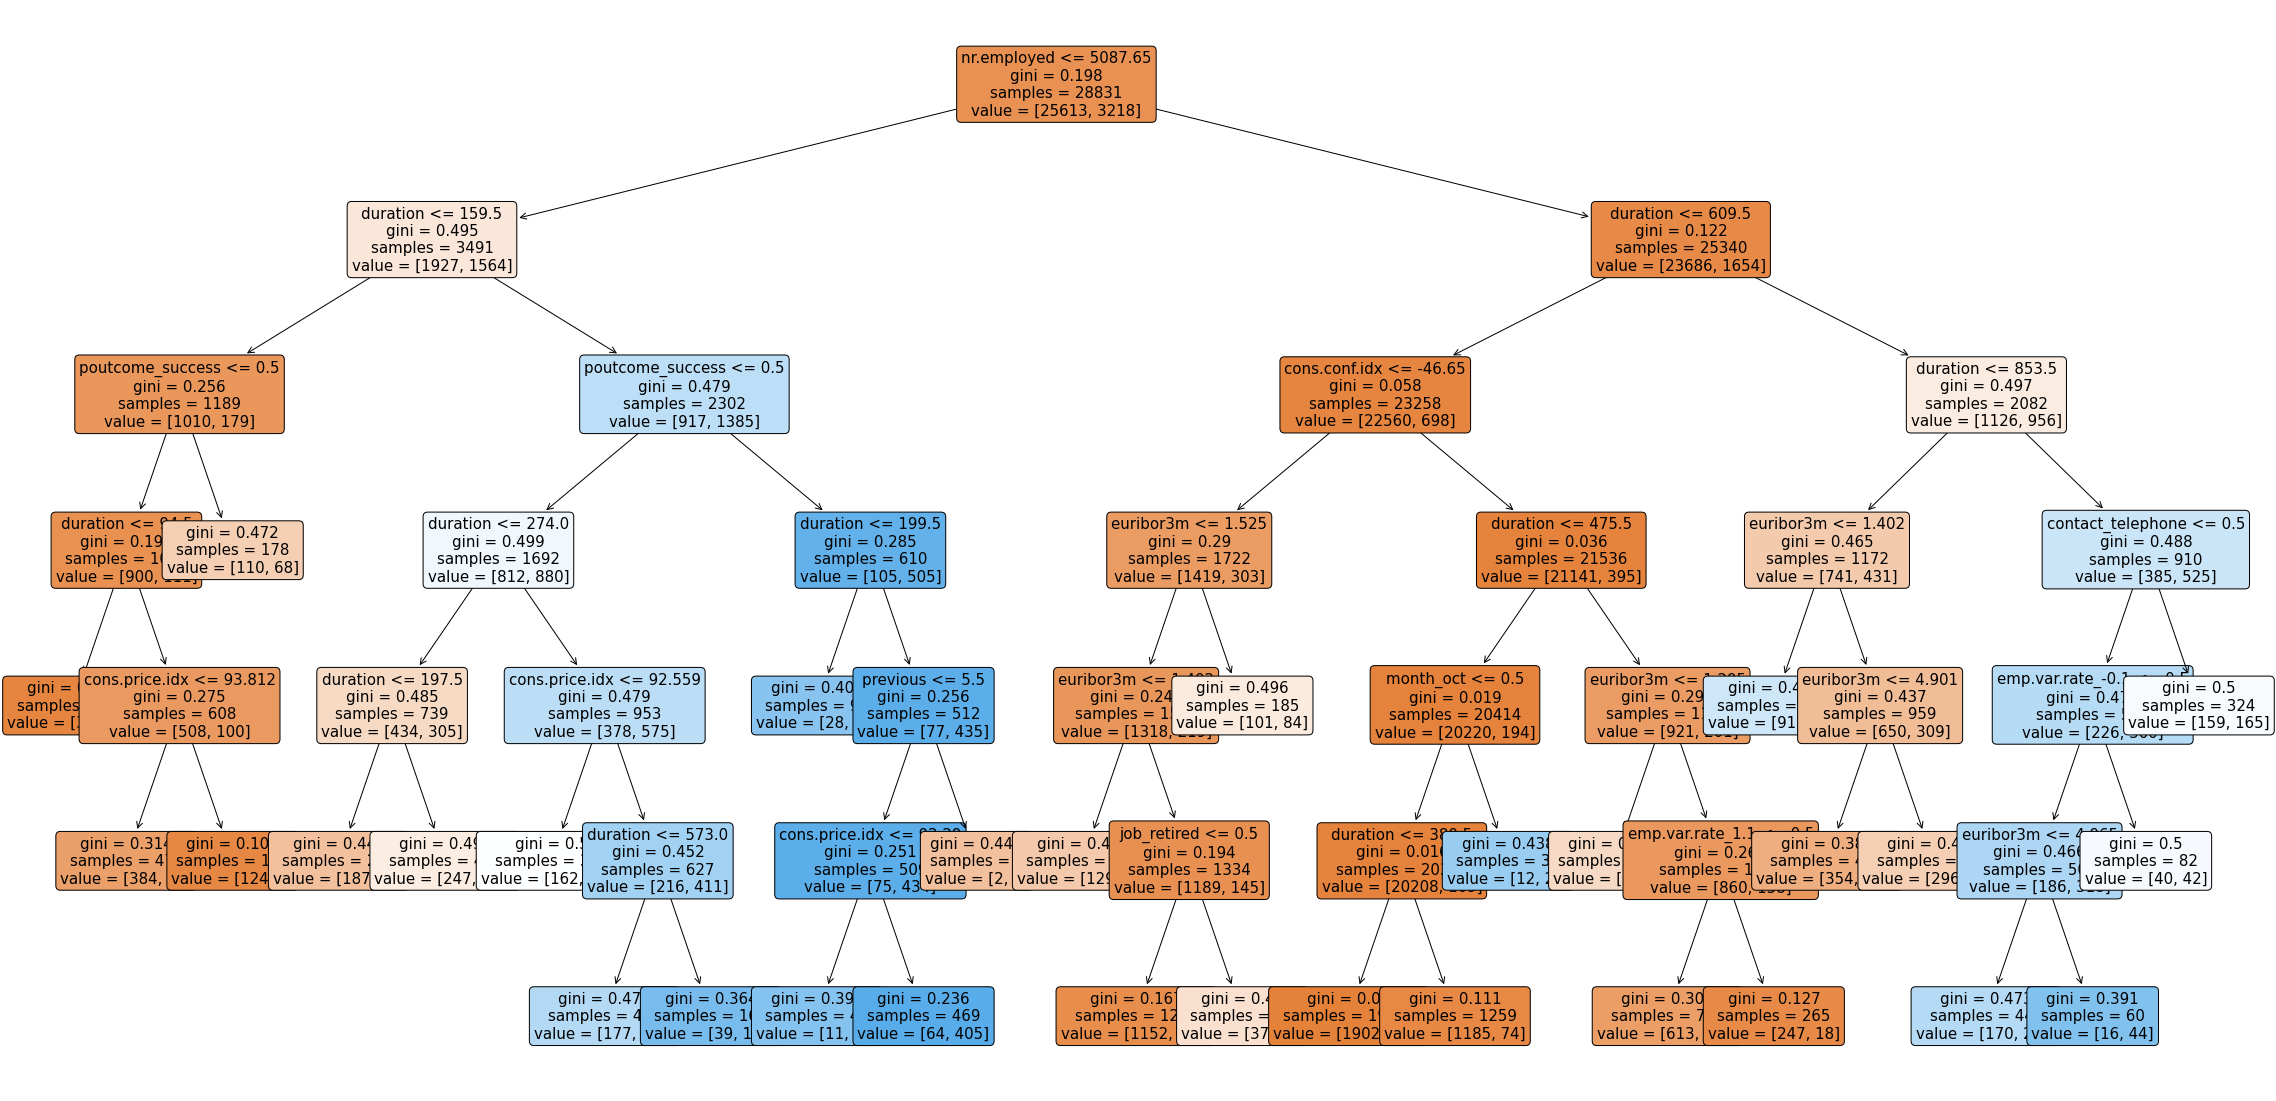

In [68]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[40,20])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [69]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=500, random_state=0)

In [70]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.320649
euribor3m,0.175896
nr.employed,0.139789
poutcome_success,0.093553
cons.conf.idx,0.069746
cons.price.idx,0.047147
emp.var.rate_-1.7,0.024132
emp.var.rate_-2.9,0.019134
poutcome_nonexistent,0.015042
previous,0.014506


In [71]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=500,
                           random_state=0)

In [72]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.460881
nr.employed,0.307206
euribor3m,0.077865
poutcome_success,0.044815
cons.conf.idx,0.033386
month_oct,0.014081
month_mar,0.008481
cons.price.idx,0.007874
campaign,0.007741
contact_telephone,0.006515


In [73]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
#y_pred_stacking=clf.predict(X_test)

In [74]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.9053168244719592
Precision 0.6425339366515838
Recall 0.39943741209563993
f1_score 0.4926279271465741


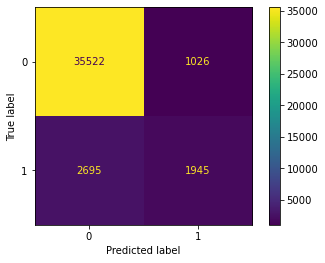

In [76]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [77]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9121955167111758
Precision 0.6463944396177237
Recall 0.5232067510548524
f1_score 0.5783132530120483


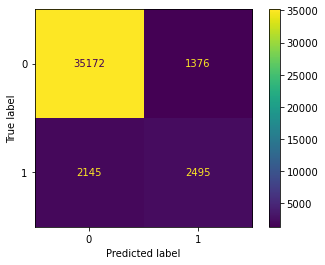

In [78]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9003803512179331
Precision 0.7519788918205804
Recall 0.20042194092827004
f1_score 0.3164908384230983


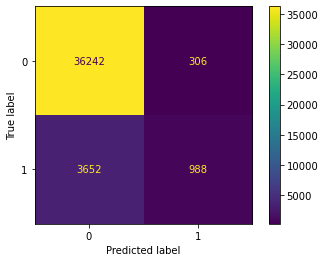

In [80]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [81]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.915270696771061
Precision 0.6629018245004344
Recall 0.5365682137834037
f1_score 0.5930820054411194


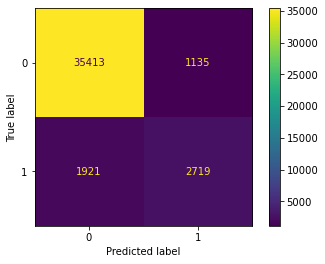

In [82]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [83]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

In [84]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.606458,0.639514,2498.0,2498.0,0.538362,0.538362,1621.0,1621.0,0.044353,0.044353,0.4940,0.100005,0.100005,1
1,9,4119,0.309056,0.245127,1273.0,3771.0,0.274353,0.812716,2846.0,4467.0,0.077870,0.122223,0.6905,0.100005,0.200010,2
2,8,4119,0.148337,0.097795,611.0,4382.0,0.131681,0.944397,3508.0,7975.0,0.095983,0.218206,0.7262,0.100005,0.300015,3
3,7,4118,0.037640,0.047498,155.0,4537.0,0.033405,0.977802,3963.0,11938.0,0.108433,0.326639,0.6512,0.099981,0.399995,4
4,6,4119,0.010682,0.028701,44.0,4581.0,0.009483,0.987284,4075.0,16013.0,0.111497,0.438136,0.5491,0.100005,0.500000,5
5,5,4119,0.005098,0.019743,21.0,4602.0,0.004526,0.991810,4098.0,20111.0,0.112127,0.550263,0.4415,0.100005,0.600005,6
6,4,4118,0.004614,0.014798,19.0,4621.0,0.004095,0.995905,4099.0,24210.0,0.112154,0.662417,0.3335,0.099981,0.699985,7
7,3,4119,0.003399,0.011258,14.0,4635.0,0.003017,0.998922,4105.0,28315.0,0.112318,0.774735,0.2242,0.100005,0.799990,8
8,2,4119,0.000971,0.007620,4.0,4639.0,0.000862,0.999784,4115.0,32430.0,0.112592,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.003933,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


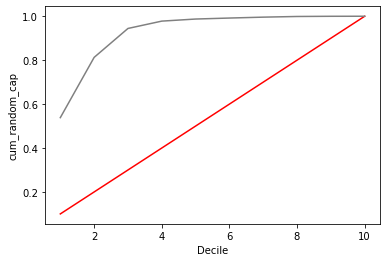

In [85]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [86]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.633406,0.632839,2609.0,2609.0,0.562284,0.562284,1510.0,1510.0,0.041316,0.041316,0.5210,0.100005,0.100005,1
1,9,4119,0.329206,0.328565,1356.0,3965.0,0.292241,0.854526,2763.0,4273.0,0.075599,0.116915,0.7376,0.100005,0.200010,2
2,8,4119,0.114834,0.100059,473.0,4438.0,0.101940,0.956466,3646.0,7919.0,0.099759,0.216674,0.7398,0.100005,0.300015,3
3,7,4118,0.028898,0.020242,119.0,4557.0,0.025647,0.982112,3999.0,11918.0,0.109418,0.326092,0.6560,0.099981,0.399995,4
4,6,4119,0.009468,0.004969,39.0,4596.0,0.008405,0.990517,4080.0,15998.0,0.111634,0.437726,0.5528,0.100005,0.500000,5
5,5,4119,0.006069,0.004969,25.0,4621.0,0.005388,0.995905,4094.0,20092.0,0.112017,0.549743,0.4462,0.100005,0.600005,6
6,4,4118,0.002428,0.004969,10.0,4631.0,0.002155,0.998060,4108.0,24200.0,0.112400,0.662143,0.3359,0.099981,0.699985,7
7,3,4119,0.001457,0.004969,6.0,4637.0,0.001293,0.999353,4113.0,28313.0,0.112537,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000486,0.004969,2.0,4639.0,0.000431,0.999784,4117.0,32430.0,0.112646,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.004969,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


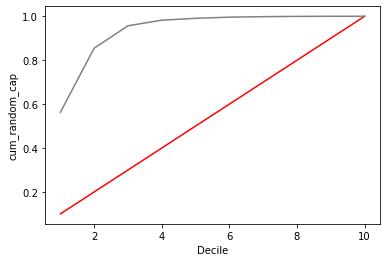

In [87]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [88]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.588492,0.462728,2424.0,2424.0,0.522414,0.522414,1695.0,1695.0,0.046377,0.046377,0.4760,0.100005,0.100005,1
1,9,4119,0.334304,0.293885,1377.0,3801.0,0.296767,0.819181,2742.0,4437.0,0.075025,0.121402,0.6978,0.100005,0.200010,2
2,8,4119,0.153678,0.123784,633.0,4434.0,0.136422,0.955603,3486.0,7923.0,0.095381,0.216783,0.7388,0.100005,0.300015,3
3,7,4118,0.015542,0.064917,64.0,4498.0,0.013793,0.969397,4054.0,11977.0,0.110923,0.327706,0.6417,0.099981,0.399995,4
4,6,4119,0.022336,0.038372,92.0,4590.0,0.019828,0.989224,4027.0,16004.0,0.110184,0.437890,0.5513,0.100005,0.500000,5
5,5,4119,0.007283,0.030886,30.0,4620.0,0.006466,0.995690,4089.0,20093.0,0.111880,0.549770,0.4459,0.100005,0.600005,6
6,4,4118,0.000971,0.029307,4.0,4624.0,0.000862,0.996552,4114.0,24207.0,0.112564,0.662334,0.3342,0.099981,0.699985,7
7,3,4119,0.003156,0.026581,13.0,4637.0,0.002802,0.999353,4106.0,28313.0,0.112345,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000000,0.023203,0.0,4637.0,0.000000,0.999353,4119.0,32432.0,0.112701,0.887381,0.1120,0.100005,0.899995,9
9,1,4119,0.000728,0.020054,3.0,4640.0,0.000647,1.000000,4116.0,36548.0,0.112619,1.000000,-0.0000,0.100005,1.000000,10


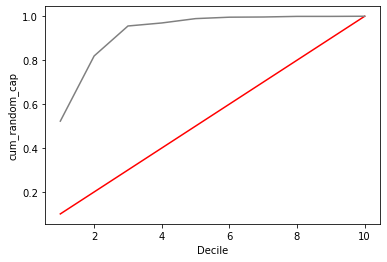

In [89]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [90]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.695314,0.668967,2864.0,2864.0,0.617241,0.617241,1255.0,1255.0,0.034338,0.034338,0.5829,0.100005,0.100005,1
1,9,4119,0.310755,0.313418,1280.0,4144.0,0.275862,0.893103,2839.0,4094.0,0.077679,0.112017,0.7811,0.100005,0.200010,2
2,8,4119,0.095897,0.089887,395.0,4539.0,0.085129,0.978233,3724.0,7818.0,0.101893,0.213910,0.7643,0.100005,0.300015,3
3,7,4118,0.019184,0.018030,79.0,4618.0,0.017026,0.995259,4039.0,11857.0,0.110512,0.324423,0.6708,0.099981,0.399995,4
4,6,4119,0.003884,0.007348,16.0,4634.0,0.003448,0.998707,4103.0,15960.0,0.112263,0.436686,0.5620,0.100005,0.500000,5
5,5,4119,0.001214,0.004682,5.0,4639.0,0.001078,0.999784,4114.0,20074.0,0.112564,0.549250,0.4505,0.100005,0.600005,6
6,4,4118,0.000000,0.003289,0.0,4639.0,0.000000,0.999784,4118.0,24192.0,0.112674,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002795,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.002358,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001377,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


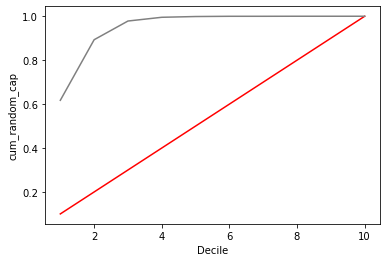

In [91]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [92]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with retention offers in Telecom

In [94]:
df['Predicted_Response_Rank']=np.where(df['P_Rank_GBM']>8,"Top 2","Bottom 8")

In [95]:
df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 8,0.015053
Top 2,0.503035


In [96]:
df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [97]:
df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


In [98]:
df['duration'].mean()

258.2850101971448

In [99]:
df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

In [100]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6536,5821
Low Duration,26414,2417


In [101]:
###### Recommendations ##########
# Phase 1 - Speak to customers who falls in top 2 predicted ranks(deciles) and also are in High Duration segment
# Similarly - Phase 2 ( Top 2 , Low Duration)
# Phase 3 - Bottom 7 and High Duration (randomly select 25% of them only)